In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
# Load the dataset from a public repository
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical columns to numerical
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Display the first few rows after preprocessing
data.head()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [7]:
# Separate features (inputs) and labels (target)
X = data.drop('charges', axis=1)  # Features
y = data['charges']  # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (1070, 8)
Testing features shape: (268, 8)
Training labels shape: (1070,)
Testing labels shape: (268,)


In [5]:
# Display column names
print(data.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [8]:
# Initialize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target (charges) on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 4181.194473753645


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
model.fit(X_train_scaled, y_train)

# Predict and evaluate again
y_pred_scaled = model.predict(X_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print(f"Mean Absolute Error (after scaling): {mae_scaled}")


Mean Absolute Error (after scaling): 4181.1944737536505


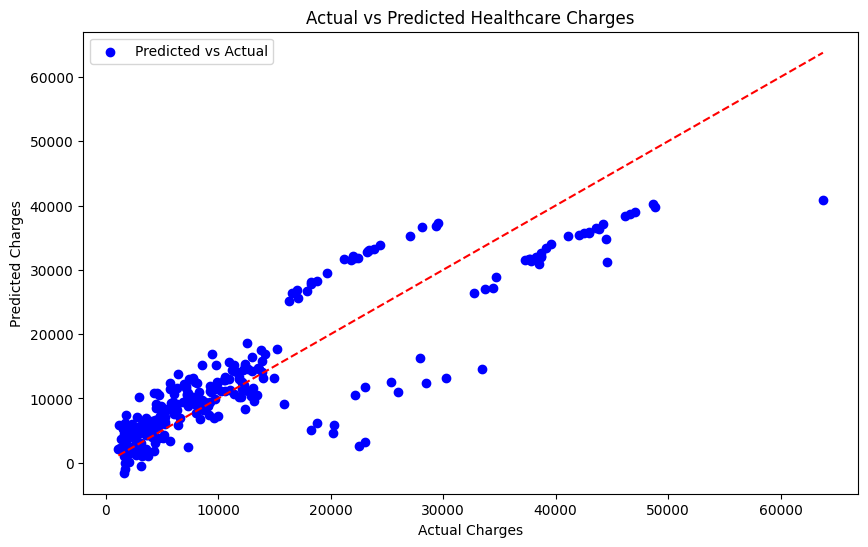

In [10]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Healthcare Charges')
plt.legend()
plt.show()


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model using Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (Random Forest): {mae_rf}")


Mean Absolute Error (Random Forest): 2523.8013476647434


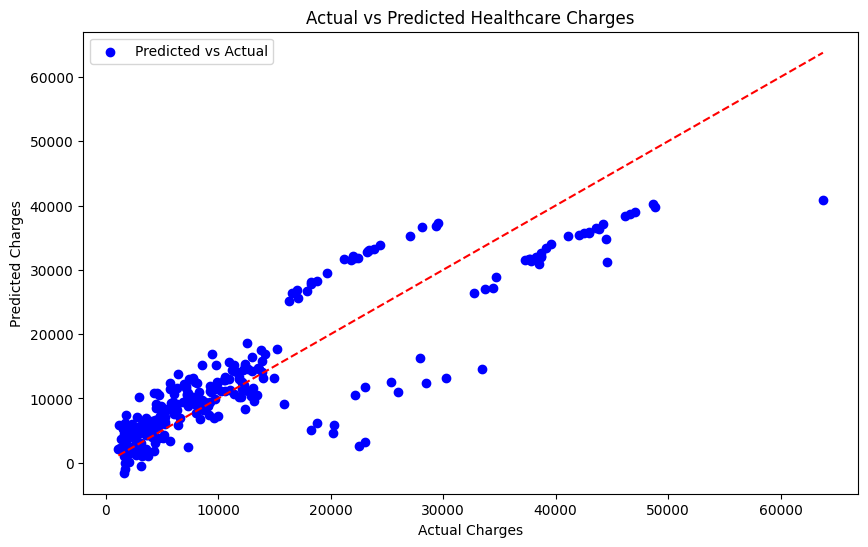

In [12]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Healthcare Charges')
plt.legend()
plt.show()
